In [1]:
import re 
import datetime
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
RANDOM_SEED = 42
!pip freeze > requirements.txt
main = pd.read_csv('main_task.xls')
main


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [2]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [3]:
main['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [4]:
def cash(x):
    if x == '$':
        return 1
    if x == '$$ - $$$':
        return 2
    if x == '$$$$':
        return 3       

In [5]:
main['Price Range'] = main[~main['Price Range'].isna()]['Price Range'].apply(cash)
main['Price Range']

0        2.0
1        NaN
2        3.0
3        NaN
4        2.0
        ... 
39995    2.0
39996    2.0
39997    NaN
39998    2.0
39999    2.0
Name: Price Range, Length: 40000, dtype: float64

count    26114.000000
mean         1.814046
std          0.510263
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Price Range, dtype: float64

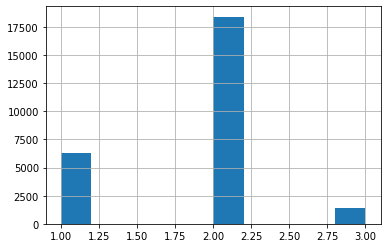

In [6]:
main['Price Range'].hist()
main['Price Range'].describe()

In [7]:
main['Price Range'] = main['Price Range'].fillna(2)
main['Price Range']

0        2.0
1        2.0
2        3.0
3        2.0
4        2.0
        ... 
39995    2.0
39996    2.0
39997    2.0
39998    2.0
39999    2.0
Name: Price Range, Length: 40000, dtype: float64

<AxesSubplot:>

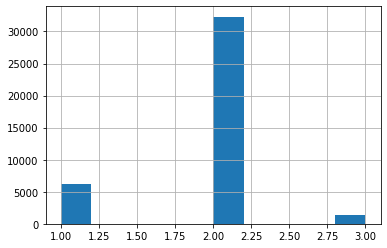

In [8]:
main['Price Range'].hist()

In [9]:
main['Cuisine Style'].unique()

array(["['European', 'French', 'International']", nan,
       "['Japanese', 'Sushi', 'Asian', 'Grill', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']",
       ...,
       "['Steakhouse', 'Barbecue', 'Australian', 'Argentinean', 'South American']",
       "['French', 'American', 'Cafe', 'Healthy', 'Soups']",
       "['French', 'Contemporary', 'Fusion', 'Gastropub']"], dtype=object)

In [10]:
def clean(x):
    return x.replace('[','').replace(']','').replace("'",'').replace(', ',',').split(',')

main['Cuisine Style'] = main[~main['Cuisine Style'].isna()]['Cuisine Style'].apply(clean)
main['Cuisine Style']

0                        [European, French, International]
1                                                      NaN
2        [Japanese, Sushi, Asian, Grill, Vegetarian Fri...
3                                                      NaN
4          [German, Central European, Vegetarian Friendly]
                               ...                        
39995    [Italian, Vegetarian Friendly, Vegan Options, ...
39996    [French, American, Bar, European, Vegetarian F...
39997                                    [Japanese, Sushi]
39998    [Polish, European, Eastern European, Central E...
39999                                            [Spanish]
Name: Cuisine Style, Length: 40000, dtype: object

In [11]:
popular_cuisine = main[~main['Cuisine Style'].isna()].explode('Cuisine Style')['Cuisine Style'].value_counts()
popular_cuisine

Vegetarian Friendly    11189
European               10060
Mediterranean           6277
Italian                 5964
Vegan Options           4486
                       ...  
Latvian                    1
Xinjiang                   1
Burmese                    1
Salvadoran                 1
Yunnan                     1
Name: Cuisine Style, Length: 125, dtype: int64

In [12]:
def tester(list_cuisine):
    for cuisine in list_cuisine:
        if cuisine in popular_cuisine:
            return popular_cuisine[list_cuisine].sum()
    
main['popular_cuisine'] = main[~main['Cuisine Style'].isna()]['Cuisine Style'].apply(tester)
main['popular_cuisine']

0        14834.0
1            NaN
2        25909.0
3            NaN
4        13244.0
          ...   
39995    25752.0
39996    29051.0
39997     2620.0
39998    23503.0
39999     2798.0
Name: popular_cuisine, Length: 40000, dtype: float64

count    30717.000000
mean     13838.334636
std      10897.575118
min          5.000000
25%       3920.000000
50%      11666.000000
75%      21306.000000
max      63278.000000
Name: popular_cuisine, dtype: float64

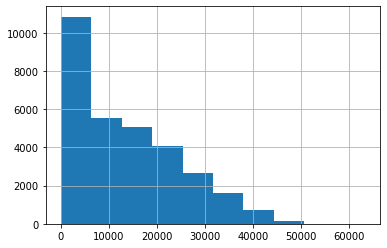

In [13]:
main['popular_cuisine'].hist()
main['popular_cuisine'].describe()

In [14]:
main['popular_cuisine'] = main['popular_cuisine'].fillna(main['popular_cuisine'].median())
main['popular_cuisine']

0        14834.0
1        11666.0
2        25909.0
3        11666.0
4        13244.0
          ...   
39995    25752.0
39996    29051.0
39997     2620.0
39998    23503.0
39999     2798.0
Name: popular_cuisine, Length: 40000, dtype: float64

<AxesSubplot:>

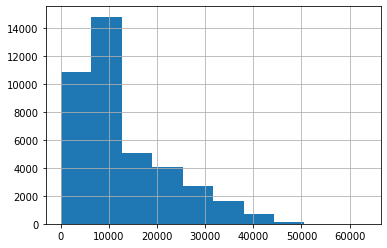

In [15]:
main['popular_cuisine'].hist()

In [16]:
main['count_cuisine'] = main[~main['Cuisine Style'].isna()]['Cuisine Style'].apply(lambda x: len(x))
main['count_cuisine']

0        3.0
1        NaN
2        7.0
3        NaN
4        3.0
        ... 
39995    4.0
39996    5.0
39997    2.0
39998    5.0
39999    1.0
Name: count_cuisine, Length: 40000, dtype: float64

count    30717.000000
mean         3.112706
std          1.806860
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         21.000000
Name: count_cuisine, dtype: float64

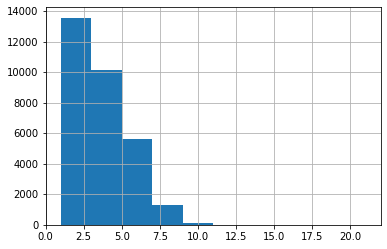

In [17]:
main['count_cuisine'].hist()
main['count_cuisine'].describe()

In [18]:
main['count_cuisine'] = main['count_cuisine'].fillna(4)
main['count_cuisine']

0        3.0
1        4.0
2        7.0
3        4.0
4        3.0
        ... 
39995    4.0
39996    5.0
39997    2.0
39998    5.0
39999    1.0
Name: count_cuisine, Length: 40000, dtype: float64

<AxesSubplot:>

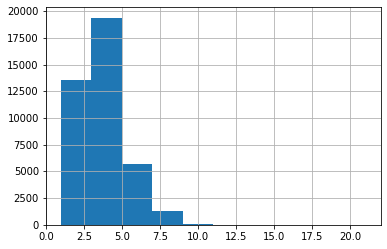

In [19]:
main['count_cuisine'].hist()

In [20]:
main['Reviews']

0        [['Good food at your doorstep', 'A good hotel ...
1        [['Unique cuisine', 'Delicious Nepalese food']...
2        [['Catch up with friends', 'Not exceptional'],...
3                                                 [[], []]
4        [['Best place to try a Bavarian food', 'Nice b...
                               ...                        
39995    [['The real Italian experience!', 'Wonderful f...
39996    [['Parisian atmosphere', 'Bit pricey but inter...
39997    [['Good by swedish standards', 'A hidden jewel...
39998    [['Underground restaurant', 'Oldest Restaurant...
39999    [['Average', 'Nice an informal'], ['01/31/2016...
Name: Reviews, Length: 40000, dtype: object

In [21]:
main['Reviews'] = main['Reviews'].apply(lambda x: x[2:-2])
main['Reviews']

0        'Good food at your doorstep', 'A good hotel re...
1        'Unique cuisine', 'Delicious Nepalese food'], ...
2        'Catch up with friends', 'Not exceptional'], [...
3                                                     ], [
4        'Best place to try a Bavarian food', 'Nice bui...
                               ...                        
39995    'The real Italian experience!', 'Wonderful foo...
39996    'Parisian atmosphere', 'Bit pricey but interes...
39997    'Good by swedish standards', 'A hidden jewel i...
39998    'Underground restaurant', 'Oldest Restaurant i...
39999    'Average', 'Nice an informal'], ['01/31/2016',...
Name: Reviews, Length: 40000, dtype: object

In [22]:
pattern = re.compile('\d\d.\d\d.\d\d\d\d')
main['Reviews_pat'] = main['Reviews'].apply(lambda x: pattern.findall(x))
main['Reviews_pat']

0        [12/31/2017, 11/20/2017]
1        [07/06/2017, 06/19/2016]
2        [01/08/2018, 01/06/2018]
3                              []
4        [11/18/2017, 02/19/2017]
                   ...           
39995    [12/16/2017, 11/12/2017]
39996    [12/21/2017, 12/12/2017]
39997    [11/03/2016, 04/12/2008]
39998    [07/11/2017, 06/18/2017]
39999    [01/31/2016, 07/04/2012]
Name: Reviews_pat, Length: 40000, dtype: object

In [23]:
def func(x):
    if len(x) == 0:
        return [np.nan]*3
    if len(x) == 1:
        return [x[0],np.nan,np.nan]
    if len(x) == 2:
        return [x[0],x[1],np.nan]
    else:
        return x
    
main['Reviews_pat'] = main['Reviews_pat'].apply(func)
main['Reviews_pat']

0        [12/31/2017, 11/20/2017, nan]
1        [07/06/2017, 06/19/2016, nan]
2        [01/08/2018, 01/06/2018, nan]
3                      [nan, nan, nan]
4        [11/18/2017, 02/19/2017, nan]
                     ...              
39995    [12/16/2017, 11/12/2017, nan]
39996    [12/21/2017, 12/12/2017, nan]
39997    [11/03/2016, 04/12/2008, nan]
39998    [07/11/2017, 06/18/2017, nan]
39999    [01/31/2016, 07/04/2012, nan]
Name: Reviews_pat, Length: 40000, dtype: object

In [24]:
main['Reviews_1'] = main['Reviews_pat'].apply(lambda x: x[0])
main['Reviews_2'] = main['Reviews_pat'].apply(lambda x: x[1])
main['Reviews_3'] = main['Reviews_pat'].apply(lambda x: x[2])
display(main[['Reviews_1','Reviews_2','Reviews_3']])

,Reviews_1,Reviews_2,Reviews_3
0,12/31/2017,11/20/2017,NaN
1,07/06/2017,06/19/2016,NaN
2,01/08/2018,01/06/2018,NaN
3,NaN,NaN,NaN
4,11/18/2017,02/19/2017,NaN
...,...,...,...
39995,12/16/2017,11/12/2017,NaN
39996,12/21/2017,12/12/2017,NaN
39997,11/03/2016,04/12/2008,NaN
39998,07/11/2017,06/18/2017,NaN


In [25]:
main['Reviews_3'].value_counts(dropna=False)

NaN           39999
12/21/2017        1
Name: Reviews_3, dtype: int64

In [26]:
def format_data(x):
    a='.'
    if a in x:
        res = x.replace('.', '/')    
    elif x=='21/12/2017':
        res = '12/21/2017'
    else:
        res = x
        return res
    
                                       
main['Reviews_1'] = main[~main['Reviews_1'].isna()]['Reviews_1'].apply(format_data)                         
main['Reviews_1'] = main[~main['Reviews_1'].isna()]['Reviews_1'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))
main['Reviews_2'] = main[~main['Reviews_2'].isna()]['Reviews_2'].apply(format_data)                         
main['Reviews_2'] = main[~main['Reviews_2'].isna()]['Reviews_2'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))

In [27]:
main['Reviews_1']

0       2017-12-31
1       2017-07-06
2       2018-01-08
3              NaT
4       2017-11-18
           ...    
39995   2017-12-16
39996   2017-12-21
39997   2016-11-03
39998   2017-07-11
39999   2016-01-31
Name: Reviews_1, Length: 40000, dtype: datetime64[ns]

In [28]:
main['Reviews_2']

0       2017-11-20
1       2016-06-19
2       2018-01-06
3              NaT
4       2017-02-19
           ...    
39995   2017-11-12
39996   2017-12-12
39997   2008-04-12
39998   2017-06-18
39999   2012-07-04
Name: Reviews_2, Length: 40000, dtype: datetime64[ns]

In [29]:
main['Reviews_delta'] = main['Reviews_1'] - main['Reviews_2']
print(main['Reviews_delta'].describe())
main['Reviews_delta'] = main['Reviews_delta'].fillna(main['Reviews_delta'].median())
main['Reviews_delta']

count                          28972
mean     124 days 02:12:27.535551568
std      231 days 12:25:22.696209352
min              -362 days +00:00:00
25%                 13 days 00:00:00
50%                 55 days 00:00:00
75%                156 days 00:00:00
max               3207 days 00:00:00
Name: Reviews_delta, dtype: object


0         41 days
1        382 days
2          2 days
3         55 days
4        272 days
           ...   
39995     34 days
39996      9 days
39997   3127 days
39998     23 days
39999   1306 days
Name: Reviews_delta, Length: 40000, dtype: timedelta64[ns]

In [30]:
main['Reviews_delta'] = main['Reviews_delta'].apply(lambda x:  x.days)
main['Reviews_delta']

0          41
1         382
2           2
3          55
4         272
         ... 
39995      34
39996       9
39997    3127
39998      23
39999    1306
Name: Reviews_delta, Length: 40000, dtype: int64

In [31]:
main

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,popular_cuisine,count_cuisine,Reviews_pat,Reviews_1,Reviews_2,Reviews_3,Reviews_delta
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,2.0,194.0,"'Good food at your doorstep', 'A good hotel re...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,14834.0,3.0,"[12/31/2017, 11/20/2017, nan]",2017-12-31,2017-11-20,NaN,41
1,id_1535,Stockholm,NaN,1537.0,4.0,2.0,10.0,"'Unique cuisine', 'Delicious Nepalese food'], ...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,11666.0,4.0,"[07/06/2017, 06/19/2016, nan]",2017-07-06,2016-06-19,NaN,382
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3.0,688.0,"'Catch up with friends', 'Not exceptional'], [...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,25909.0,7.0,"[01/08/2018, 01/06/2018, nan]",2018-01-08,2018-01-06,NaN,2
3,id_3456,Berlin,NaN,3458.0,5.0,2.0,3.0,"], [",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,11666.0,4.0,"[nan, nan, nan]",NaT,NaT,NaN,55
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,2.0,84.0,"'Best place to try a Bavarian food', 'Nice bui...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,13244.0,3.0,"[11/18/2017, 02/19/2017, nan]",2017-11-18,2017-02-19,NaN,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,4.5,2.0,79.0,"'The real Italian experience!', 'Wonderful foo...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,25752.0,4.0,"[12/16/2017, 11/12/2017, nan]",2017-12-16,2017-11-12,NaN,34
39996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,3.5,2.0,542.0,"'Parisian atmosphere', 'Bit pricey but interes...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,29051.0,5.0,"[12/21/2017, 12/12/2017, nan]",2017-12-21,2017-12-12,NaN,9
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,2.0,4.0,"'Good by swedish standards', 'A hidden jewel i...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,2620.0,2.0,"[11/03/2016, 04/12/2008, nan]",2016-11-03,2008-04-12,NaN,3127
39998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,4.0,2.0,70.0,"'Underground restaurant', 'Oldest Restaurant i...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,23503.0,5.0,"[07/11/2017, 06/18/2017, nan]",2017-07-11,2017-06-18,NaN,23


In [32]:
main['Number of Reviews'].isna().sum()

2543

In [33]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Restaurant_id      40000 non-null  object        
 1   City               40000 non-null  object        
 2   Cuisine Style      30717 non-null  object        
 3   Ranking            40000 non-null  float64       
 4   Rating             40000 non-null  float64       
 5   Price Range        40000 non-null  float64       
 6   Number of Reviews  37457 non-null  float64       
 7   Reviews            40000 non-null  object        
 8   URL_TA             40000 non-null  object        
 9   ID_TA              40000 non-null  object        
 10  popular_cuisine    40000 non-null  float64       
 11  count_cuisine      40000 non-null  float64       
 12  Reviews_pat        40000 non-null  object        
 13  Reviews_1          33528 non-null  datetime64[ns]
 14  Review

count    37457.000000
mean       124.825480
std        295.666352
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

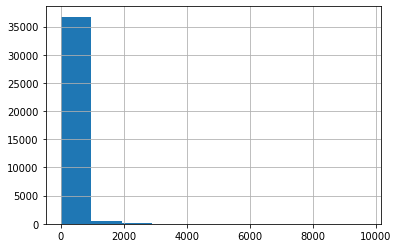

In [34]:
main['Number of Reviews'].hist()
main['Number of Reviews'].describe()

count    40000.000000
mean       118.987675
std        286.989212
min          2.000000
25%         10.000000
50%         33.000000
75%        105.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

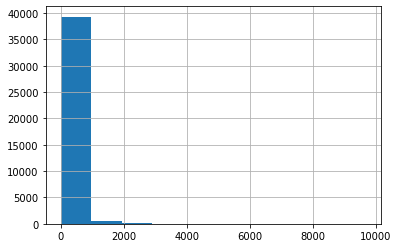

In [35]:
main['Number of Reviews'] = main['Number of Reviews'].fillna(main['Number of Reviews'].median())
main['Number of Reviews'].hist()
main['Number of Reviews'].describe()

In [36]:
X = main.drop(['Restaurant_id', 'Rating', 'City', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA', 'Reviews_pat', 'Reviews_3', 'Reviews_1', 'Reviews_2' ], axis = 1)  
y = main['Rating']
    # Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
    # Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        # Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
    # Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
    # Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
    # Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  
y_pred

array([4.18 , 3.95 , 3.8  , ..., 3.925, 4.165, 2.205])

In [37]:
X

,Ranking,Price Range,Number of Reviews,popular_cuisine,count_cuisine,Reviews_delta
0,5570.0,2.0,194.0,14834.0,3.0,41
1,1537.0,2.0,10.0,11666.0,4.0,382
2,353.0,3.0,688.0,25909.0,7.0,2
3,3458.0,2.0,3.0,11666.0,4.0,55
4,621.0,2.0,84.0,13244.0,3.0,272
...,...,...,...,...,...,...
39995,500.0,2.0,79.0,25752.0,4.0,34
39996,6341.0,2.0,542.0,29051.0,5.0,9
39997,1652.0,2.0,4.0,2620.0,2.0,3127
39998,641.0,2.0,70.0,23503.0,5.0,23


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            40000 non-null  float64
 1   Price Range        40000 non-null  float64
 2   Number of Reviews  40000 non-null  float64
 3   popular_cuisine    40000 non-null  float64
 4   count_cuisine      40000 non-null  float64
 5   Reviews_delta      40000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.8 MB


In [39]:
y

0        3.5
1        4.0
2        4.5
3        5.0
4        4.0
        ... 
39995    4.5
39996    3.5
39997    4.5
39998    4.0
39999    3.0
Name: Rating, Length: 40000, dtype: float64

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.3782563857142857


In [41]:
del(main['Reviews_3'])

In [42]:
main

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,popular_cuisine,count_cuisine,Reviews_pat,Reviews_1,Reviews_2,Reviews_delta
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,2.0,194.0,"'Good food at your doorstep', 'A good hotel re...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,14834.0,3.0,"[12/31/2017, 11/20/2017, nan]",2017-12-31,2017-11-20,41
1,id_1535,Stockholm,NaN,1537.0,4.0,2.0,10.0,"'Unique cuisine', 'Delicious Nepalese food'], ...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,11666.0,4.0,"[07/06/2017, 06/19/2016, nan]",2017-07-06,2016-06-19,382
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3.0,688.0,"'Catch up with friends', 'Not exceptional'], [...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,25909.0,7.0,"[01/08/2018, 01/06/2018, nan]",2018-01-08,2018-01-06,2
3,id_3456,Berlin,NaN,3458.0,5.0,2.0,3.0,"], [",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,11666.0,4.0,"[nan, nan, nan]",NaT,NaT,55
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,2.0,84.0,"'Best place to try a Bavarian food', 'Nice bui...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,13244.0,3.0,"[11/18/2017, 02/19/2017, nan]",2017-11-18,2017-02-19,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,4.5,2.0,79.0,"'The real Italian experience!', 'Wonderful foo...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,25752.0,4.0,"[12/16/2017, 11/12/2017, nan]",2017-12-16,2017-11-12,34
39996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,3.5,2.0,542.0,"'Parisian atmosphere', 'Bit pricey but interes...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,29051.0,5.0,"[12/21/2017, 12/12/2017, nan]",2017-12-21,2017-12-12,9
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,2.0,4.0,"'Good by swedish standards', 'A hidden jewel i...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,2620.0,2.0,"[11/03/2016, 04/12/2008, nan]",2016-11-03,2008-04-12,3127
39998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,4.0,2.0,70.0,"'Underground restaurant', 'Oldest Restaurant i...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,23503.0,5.0,"[07/11/2017, 06/18/2017, nan]",2017-07-11,2017-06-18,23


In [43]:
main['Reviews_1'].min()

Timestamp('2004-04-21 00:00:00')

In [44]:
main['Reviews_1'] = main['Reviews_1'] - main['Reviews_1'].min()
main['Reviews_2'] = main['Reviews_2'] - main['Reviews_2'].min()
main['Reviews_1'] = main['Reviews_1'].apply(lambda x:  x.days)
main['Reviews_2'] = main['Reviews_2'].apply(lambda x:  x.days)
main['Reviews_1']

0        5002.0
1        4824.0
2        5010.0
3           NaN
4        4959.0
          ...  
39995    4987.0
39996    4992.0
39997    4579.0
39998    4829.0
39999    4302.0
Name: Reviews_1, Length: 40000, dtype: float64

count    33528.000000
mean      4762.011960
std        362.444711
min          0.000000
25%       4704.000000
50%       4892.000000
75%       4977.000000
max       5059.000000
Name: Reviews_1, dtype: float64

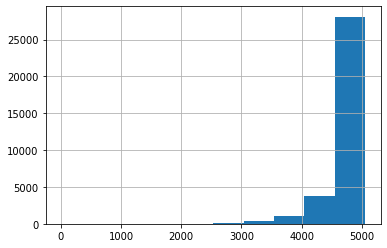

In [45]:
main['Reviews_1'].hist()
main['Reviews_1'].describe()

count    28973.000000
mean      3390.761157
std        396.620564
min          0.000000
25%       3291.000000
50%       3527.000000
75%       3640.000000
max       3757.000000
Name: Reviews_2, dtype: float64

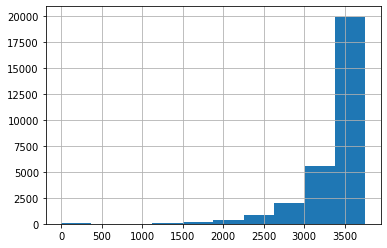

In [46]:
main['Reviews_2'].hist()
main['Reviews_2'].describe()

In [47]:
main['Reviews_1'] = main['Reviews_1'].fillna(0)
main['Reviews_2'] = main['Reviews_2'].fillna(0)

In [48]:
main['Reviews_1']

0        5002.0
1        4824.0
2        5010.0
3           0.0
4        4959.0
          ...  
39995    4987.0
39996    4992.0
39997    4579.0
39998    4829.0
39999    4302.0
Name: Reviews_1, Length: 40000, dtype: float64

In [49]:

main['Reviews_2']

0        3659.0
1        3140.0
2        3706.0
3           0.0
4        3385.0
          ...  
39995    3651.0
39996    3681.0
39997     150.0
39998    3504.0
39999    1694.0
Name: Reviews_2, Length: 40000, dtype: float64

In [50]:
a = main.groupby(['City'])['Ranking'].count()
a

City
Amsterdam     1086
Athens         628
Barcelona     2734
Berlin        2155
Bratislava     301
Brussels      1060
Budapest       816
Copenhagen     659
Dublin         673
Edinburgh      596
Geneva         481
Hamburg        949
Helsinki       376
Krakow         443
Lisbon        1300
Ljubljana      183
London        5757
Luxembourg     210
Lyon           892
Madrid        3108
Milan         2133
Munich         893
Oporto         513
Oslo           385
Paris         4897
Prague        1443
Rome          2078
Stockholm      820
Vienna        1166
Warsaw         727
Zurich         538
Name: Ranking, dtype: int64

In [51]:
b = main.groupby(['City'])['Ranking'].count().mean()
b

1290.3225806451612

In [52]:
w = pd.Series(a/b)                                   
w

City
Amsterdam     0.841650
Athens        0.486700
Barcelona     2.118850
Berlin        1.670125
Bratislava    0.233275
Brussels      0.821500
Budapest      0.632400
Copenhagen    0.510725
Dublin        0.521575
Edinburgh     0.461900
Geneva        0.372775
Hamburg       0.735475
Helsinki      0.291400
Krakow        0.343325
Lisbon        1.007500
Ljubljana     0.141825
London        4.461675
Luxembourg    0.162750
Lyon          0.691300
Madrid        2.408700
Milan         1.653075
Munich        0.692075
Oporto        0.397575
Oslo          0.298375
Paris         3.795175
Prague        1.118325
Rome          1.610450
Stockholm     0.635500
Vienna        0.903650
Warsaw        0.563425
Zurich        0.416950
Name: Ranking, dtype: float64

In [53]:
main
    

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,popular_cuisine,count_cuisine,Reviews_pat,Reviews_1,Reviews_2,Reviews_delta
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,2.0,194.0,"'Good food at your doorstep', 'A good hotel re...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,14834.0,3.0,"[12/31/2017, 11/20/2017, nan]",5002.0,3659.0,41
1,id_1535,Stockholm,NaN,1537.0,4.0,2.0,10.0,"'Unique cuisine', 'Delicious Nepalese food'], ...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,11666.0,4.0,"[07/06/2017, 06/19/2016, nan]",4824.0,3140.0,382
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3.0,688.0,"'Catch up with friends', 'Not exceptional'], [...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,25909.0,7.0,"[01/08/2018, 01/06/2018, nan]",5010.0,3706.0,2
3,id_3456,Berlin,NaN,3458.0,5.0,2.0,3.0,"], [",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,11666.0,4.0,"[nan, nan, nan]",0.0,0.0,55
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,2.0,84.0,"'Best place to try a Bavarian food', 'Nice bui...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,13244.0,3.0,"[11/18/2017, 02/19/2017, nan]",4959.0,3385.0,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,4.5,2.0,79.0,"'The real Italian experience!', 'Wonderful foo...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,25752.0,4.0,"[12/16/2017, 11/12/2017, nan]",4987.0,3651.0,34
39996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,3.5,2.0,542.0,"'Parisian atmosphere', 'Bit pricey but interes...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,29051.0,5.0,"[12/21/2017, 12/12/2017, nan]",4992.0,3681.0,9
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,2.0,4.0,"'Good by swedish standards', 'A hidden jewel i...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,2620.0,2.0,"[11/03/2016, 04/12/2008, nan]",4579.0,150.0,3127
39998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,4.0,2.0,70.0,"'Underground restaurant', 'Oldest Restaurant i...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,23503.0,5.0,"[07/11/2017, 06/18/2017, nan]",4829.0,3504.0,23


In [54]:
main['City_f'] = main['City'].apply(lambda x: w.loc[x])
main['City_f']

0        3.795175
1        0.635500
2        4.461675
3        1.670125
4        0.692075
           ...   
39995    1.653075
39996    3.795175
39997    0.635500
39998    0.563425
39999    1.653075
Name: City_f, Length: 40000, dtype: float64

In [55]:
main

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,popular_cuisine,count_cuisine,Reviews_pat,Reviews_1,Reviews_2,Reviews_delta,City_f
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,2.0,194.0,"'Good food at your doorstep', 'A good hotel re...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,14834.0,3.0,"[12/31/2017, 11/20/2017, nan]",5002.0,3659.0,41,3.795175
1,id_1535,Stockholm,NaN,1537.0,4.0,2.0,10.0,"'Unique cuisine', 'Delicious Nepalese food'], ...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,11666.0,4.0,"[07/06/2017, 06/19/2016, nan]",4824.0,3140.0,382,0.635500
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3.0,688.0,"'Catch up with friends', 'Not exceptional'], [...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,25909.0,7.0,"[01/08/2018, 01/06/2018, nan]",5010.0,3706.0,2,4.461675
3,id_3456,Berlin,NaN,3458.0,5.0,2.0,3.0,"], [",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,11666.0,4.0,"[nan, nan, nan]",0.0,0.0,55,1.670125
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,2.0,84.0,"'Best place to try a Bavarian food', 'Nice bui...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,13244.0,3.0,"[11/18/2017, 02/19/2017, nan]",4959.0,3385.0,272,0.692075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,4.5,2.0,79.0,"'The real Italian experience!', 'Wonderful foo...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,25752.0,4.0,"[12/16/2017, 11/12/2017, nan]",4987.0,3651.0,34,1.653075
39996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,3.5,2.0,542.0,"'Parisian atmosphere', 'Bit pricey but interes...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,29051.0,5.0,"[12/21/2017, 12/12/2017, nan]",4992.0,3681.0,9,3.795175
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,2.0,4.0,"'Good by swedish standards', 'A hidden jewel i...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,2620.0,2.0,"[11/03/2016, 04/12/2008, nan]",4579.0,150.0,3127,0.635500
39998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,4.0,2.0,70.0,"'Underground restaurant', 'Oldest Restaurant i...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,23503.0,5.0,"[07/11/2017, 06/18/2017, nan]",4829.0,3504.0,23,0.563425


In [56]:
X = main.drop(['Restaurant_id', 'Rating', 'City', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA', 'Reviews_pat', 'Reviews_2'], axis = 1)  
y = main['Rating']
    # Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
    # Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        # Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
    # Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
    # Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
    # Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  
y_pred

array([3.225, 4.755, 3.   , ..., 5.   , 4.395, 3.97 ])

In [57]:
X

,Ranking,Price Range,Number of Reviews,popular_cuisine,count_cuisine,Reviews_1,Reviews_delta,City_f
0,5570.0,2.0,194.0,14834.0,3.0,5002.0,41,3.795175
1,1537.0,2.0,10.0,11666.0,4.0,4824.0,382,0.635500
2,353.0,3.0,688.0,25909.0,7.0,5010.0,2,4.461675
3,3458.0,2.0,3.0,11666.0,4.0,0.0,55,1.670125
4,621.0,2.0,84.0,13244.0,3.0,4959.0,272,0.692075
...,...,...,...,...,...,...,...,...
39995,500.0,2.0,79.0,25752.0,4.0,4987.0,34,1.653075
39996,6341.0,2.0,542.0,29051.0,5.0,4992.0,9,3.795175
39997,1652.0,2.0,4.0,2620.0,2.0,4579.0,3127,0.635500
39998,641.0,2.0,70.0,23503.0,5.0,4829.0,23,0.563425


In [58]:
y

0        3.5
1        4.0
2        4.5
3        5.0
4        4.0
        ... 
39995    4.5
39996    3.5
39997    4.5
39998    4.0
39999    3.0
Name: Rating, Length: 40000, dtype: float64

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.209377


<AxesSubplot:>

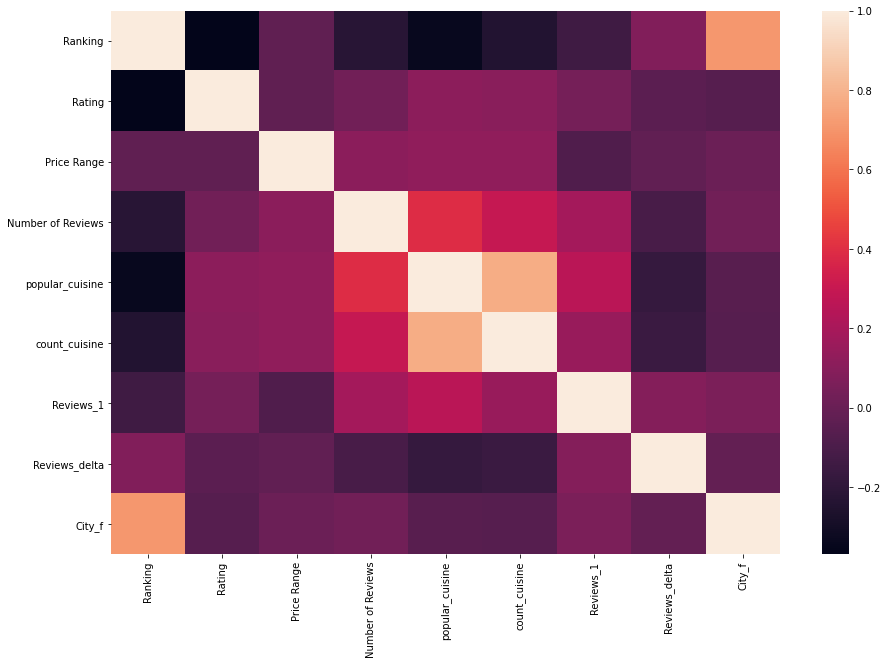

In [60]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(main.drop(['Restaurant_id', 'City', 'Cuisine Style', 'Reviews','URL_TA', 'ID_TA', 'Reviews_2'],axis=1).corr(),)

In [61]:
main

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,popular_cuisine,count_cuisine,Reviews_pat,Reviews_1,Reviews_2,Reviews_delta,City_f
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,2.0,194.0,"'Good food at your doorstep', 'A good hotel re...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,14834.0,3.0,"[12/31/2017, 11/20/2017, nan]",5002.0,3659.0,41,3.795175
1,id_1535,Stockholm,NaN,1537.0,4.0,2.0,10.0,"'Unique cuisine', 'Delicious Nepalese food'], ...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,11666.0,4.0,"[07/06/2017, 06/19/2016, nan]",4824.0,3140.0,382,0.635500
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3.0,688.0,"'Catch up with friends', 'Not exceptional'], [...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,25909.0,7.0,"[01/08/2018, 01/06/2018, nan]",5010.0,3706.0,2,4.461675
3,id_3456,Berlin,NaN,3458.0,5.0,2.0,3.0,"], [",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,11666.0,4.0,"[nan, nan, nan]",0.0,0.0,55,1.670125
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,2.0,84.0,"'Best place to try a Bavarian food', 'Nice bui...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,13244.0,3.0,"[11/18/2017, 02/19/2017, nan]",4959.0,3385.0,272,0.692075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,4.5,2.0,79.0,"'The real Italian experience!', 'Wonderful foo...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,25752.0,4.0,"[12/16/2017, 11/12/2017, nan]",4987.0,3651.0,34,1.653075
39996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,3.5,2.0,542.0,"'Parisian atmosphere', 'Bit pricey but interes...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,29051.0,5.0,"[12/21/2017, 12/12/2017, nan]",4992.0,3681.0,9,3.795175
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,2.0,4.0,"'Good by swedish standards', 'A hidden jewel i...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,2620.0,2.0,"[11/03/2016, 04/12/2008, nan]",4579.0,150.0,3127,0.635500
39998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,4.0,2.0,70.0,"'Underground restaurant', 'Oldest Restaurant i...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,23503.0,5.0,"[07/11/2017, 06/18/2017, nan]",4829.0,3504.0,23,0.563425
